# SIFT

Prior to Deep CNNs, SIFT provided the best technology for identifying objects between images. In this CC, you will get experience with the SIFT algorithm.

[SIFT](http://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_feature2d/py_sift_intro/py_sift_intro.html)

In [1]:
# Loading an image to play with

!wget https://cdn.pixabay.com/photo/2013/03/01/18/48/can-87993_960_720.jpg -O coke.jpg

--2018-06-05 16:10:32--  https://cdn.pixabay.com/photo/2013/03/01/18/48/can-87993_960_720.jpg
Resolving cdn.pixabay.com (cdn.pixabay.com)... 213.239.228.182, 213.239.228.180, 213.239.228.134, ...
Connecting to cdn.pixabay.com (cdn.pixabay.com)|213.239.228.182|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 51506 (50K) [image/jpeg]
Saving to: ‘coke.jpg’

coke.jpg            100%[===================>]  50.30K  --.-KB/s    in 0.1s    

2018-06-05 16:10:33 (336 KB/s) - ‘coke.jpg’ saved [51506/51506]



In [2]:
# Reinstalling opencv - the public distribution of OpenCV does not include SIFT,
# an algorithm patented by David Lowe and his university.

!pip uninstall -y opencv-python
!pip install opencv-contrib-python

Uninstalling opencv-python-3.4.1.15:
  Successfully uninstalled opencv-python-3.4.1.15
    100% |████████████████████████████████| 30.3MB 1.2MB/s 


/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


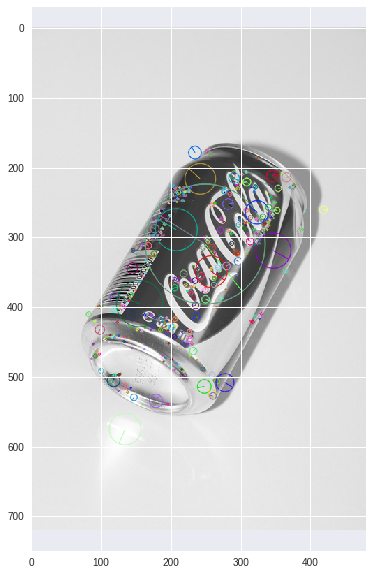

In [19]:
# Import libraries

import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load input and output images
img = cv2.imread('coke.jpg')
out = cv2.imread('coke.jpg')
# Convert to grayscale (SIFT does not work with color)
gray= cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)


# SIFT object
sift = cv2.xfeatures2d.SIFT_create()
# SIFT keypoint detection with DoG Kernel and Scale Space
kp = sift.detect(gray,None)
kp, desc = sift.compute(gray, kp)
# Draw detected features on output image
cv2.drawKeypoints(gray,kp,out,flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

plt.figure(figsize=(6,10))
plt.imshow(cv2.cvtColor(out, cv2.COLOR_BGR2RGB))
plt.axes().set_aspect('equal', 'datalim')

--2018-06-05 19:05:08--  https://images.pexels.com/photos/50593/coca-cola-cold-drink-soft-drink-coke-50593.jpeg
Resolving images.pexels.com (images.pexels.com)... 104.16.242.112, 104.16.241.112, 104.16.238.112, ...
Connecting to images.pexels.com (images.pexels.com)|104.16.242.112|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1236775 (1.2M) [image/jpeg]
Saving to: ‘coke-test.jpg’

coke-test.jpg       100%[===================>]   1.18M  --.-KB/s    in 0.08s   

2018-06-05 19:05:09 (14.1 MB/s) - ‘coke-test.jpg’ saved [1236775/1236775]



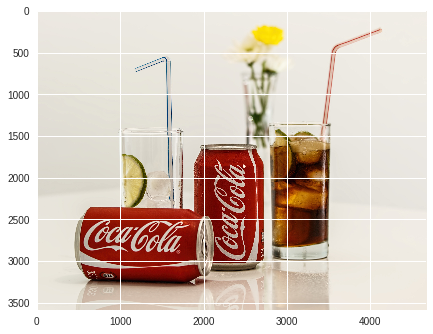

In [17]:
!wget https://images.pexels.com/photos/50593/coca-cola-cold-drink-soft-drink-coke-50593.jpeg -O coke-test.jpg
    
test = cv2.imread('coke-test.jpg')
test = test.astype(np.uint8)
plt.imshow(cv2.cvtColor(test, cv2.COLOR_BGR2RGB))



# Challenge

Apply the same SIFT algorithm to the above image containing two coke cans and print their SIFT keypoints. Can you see reusability of those keypoints? Identify visually if the algorithm has identified similar features between the training image and the test image.

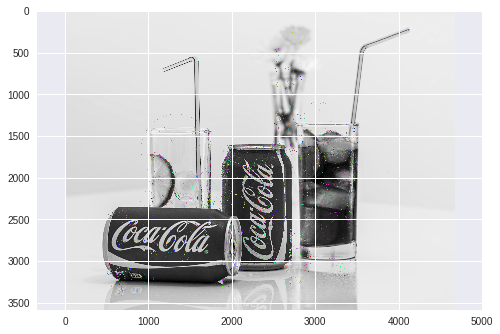

In [18]:
# Load input and output images
img1 = cv2.imread('coke-test.jpg')
out1 = cv2.imread('coke-test.jpg')
# Convert to grayscale (SIFT does not work with color)
gray1 = cv2.cvtColor(img1,cv2.COLOR_BGR2GRAY)

# SIFT keypoint detection with DoG Kernel and Scale Space
kp1,desc1 = sift.detectAndCompute(gray1,None)

# Draw detected features on output image
cv2.drawKeypoints(gray1,kp1,out1,flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

plt.axes().set_aspect('equal', 'datalim')
plt.imshow(cv2.cvtColor(out1, cv2.COLOR_BGR2RGB))

In [14]:
#print (kp1)
print (len(kp1))

6896


In [15]:
print (desc1)

[[ 31.   2.   0. ...   0.   0.   0.]
 [ 75.  20.   1. ...   0.   1.  33.]
 [ 77.  22.   1. ...   0.   2. 137.]
 ...
 [  8. 132.  44. ...   0.   0.  32.]
 [  0.   0.  20. ...   0.   0.   0.]
 [  1.  20.   4. ...   0.   1.  13.]]


# Stretch Challenge

Look for similarities in the values returned in the `kp` object between the training and test image. Can you build an algorithm that will identify them and create some threshold for marking if an image is found?

There are many approaches to this. Start by looking at the data yourself and trying to find a similarity between the descriptors you see in the images and the descriptors you see in the `kp` object.

Once you've tried to intuit a method, look at the following methods that have been described in the literature:

[Feature Matching](https://docs.opencv.org/3.0-beta/doc/py_tutorials/py_feature2d/py_matcher/py_matcher.html)

[Feature Detection and Description](http://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_feature2d/py_table_of_contents_feature2d/py_table_of_contents_feature2d.html)

**Using Brute Force Matching**

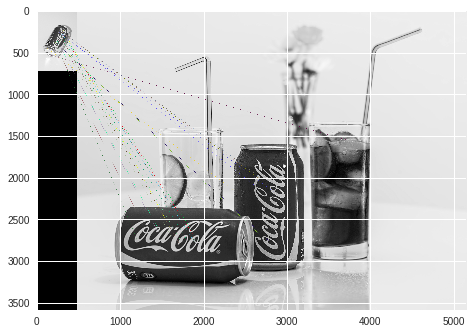

In [20]:
bf = cv2.BFMatcher()
matches = bf.knnMatch(desc, desc1, k=2)

# Apply ratio test
good = []
for m,n in matches:
    if m.distance < 0.75*n.distance:
        good.append([m])

# cv2.drawMatchesKnn expects list of lists as matches.
img2 = cv2.drawMatchesKnn(gray, kp, gray1, kp1, good, None, flags=2)

plt.imshow(img2), plt.show();

**Using Fast Library for Approximate Nearest Neighbors Approach**

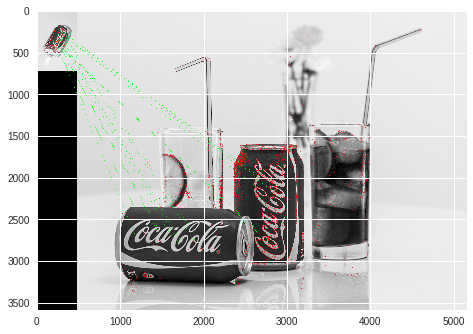

(<matplotlib.image.AxesImage at 0x7f8061db95f8>, None)

In [22]:
# FLANN parameters
FLANN_INDEX_KDTREE = 0
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks=50)   # or pass empty dictionary

flann = cv2.FlannBasedMatcher(index_params,search_params)

matches = flann.knnMatch(desc,desc1,k=2)

# Need to draw only good matches, so create a mask
matchesMask = [[0,0] for i in range(len(matches))]

# ratio test as per Lowe's paper
for i,(m,n) in enumerate(matches):
    if m.distance < 0.7*n.distance:
        matchesMask[i]=[1,0]

draw_params = dict(matchColor = (0,255,0),
                   singlePointColor = (255,0,0),
                   matchesMask = matchesMask,
                   flags = 0)

img3 = cv2.drawMatchesKnn(gray, kp, gray1, kp1,matches,None,**draw_params)

plt.imshow(img3,),plt.show()

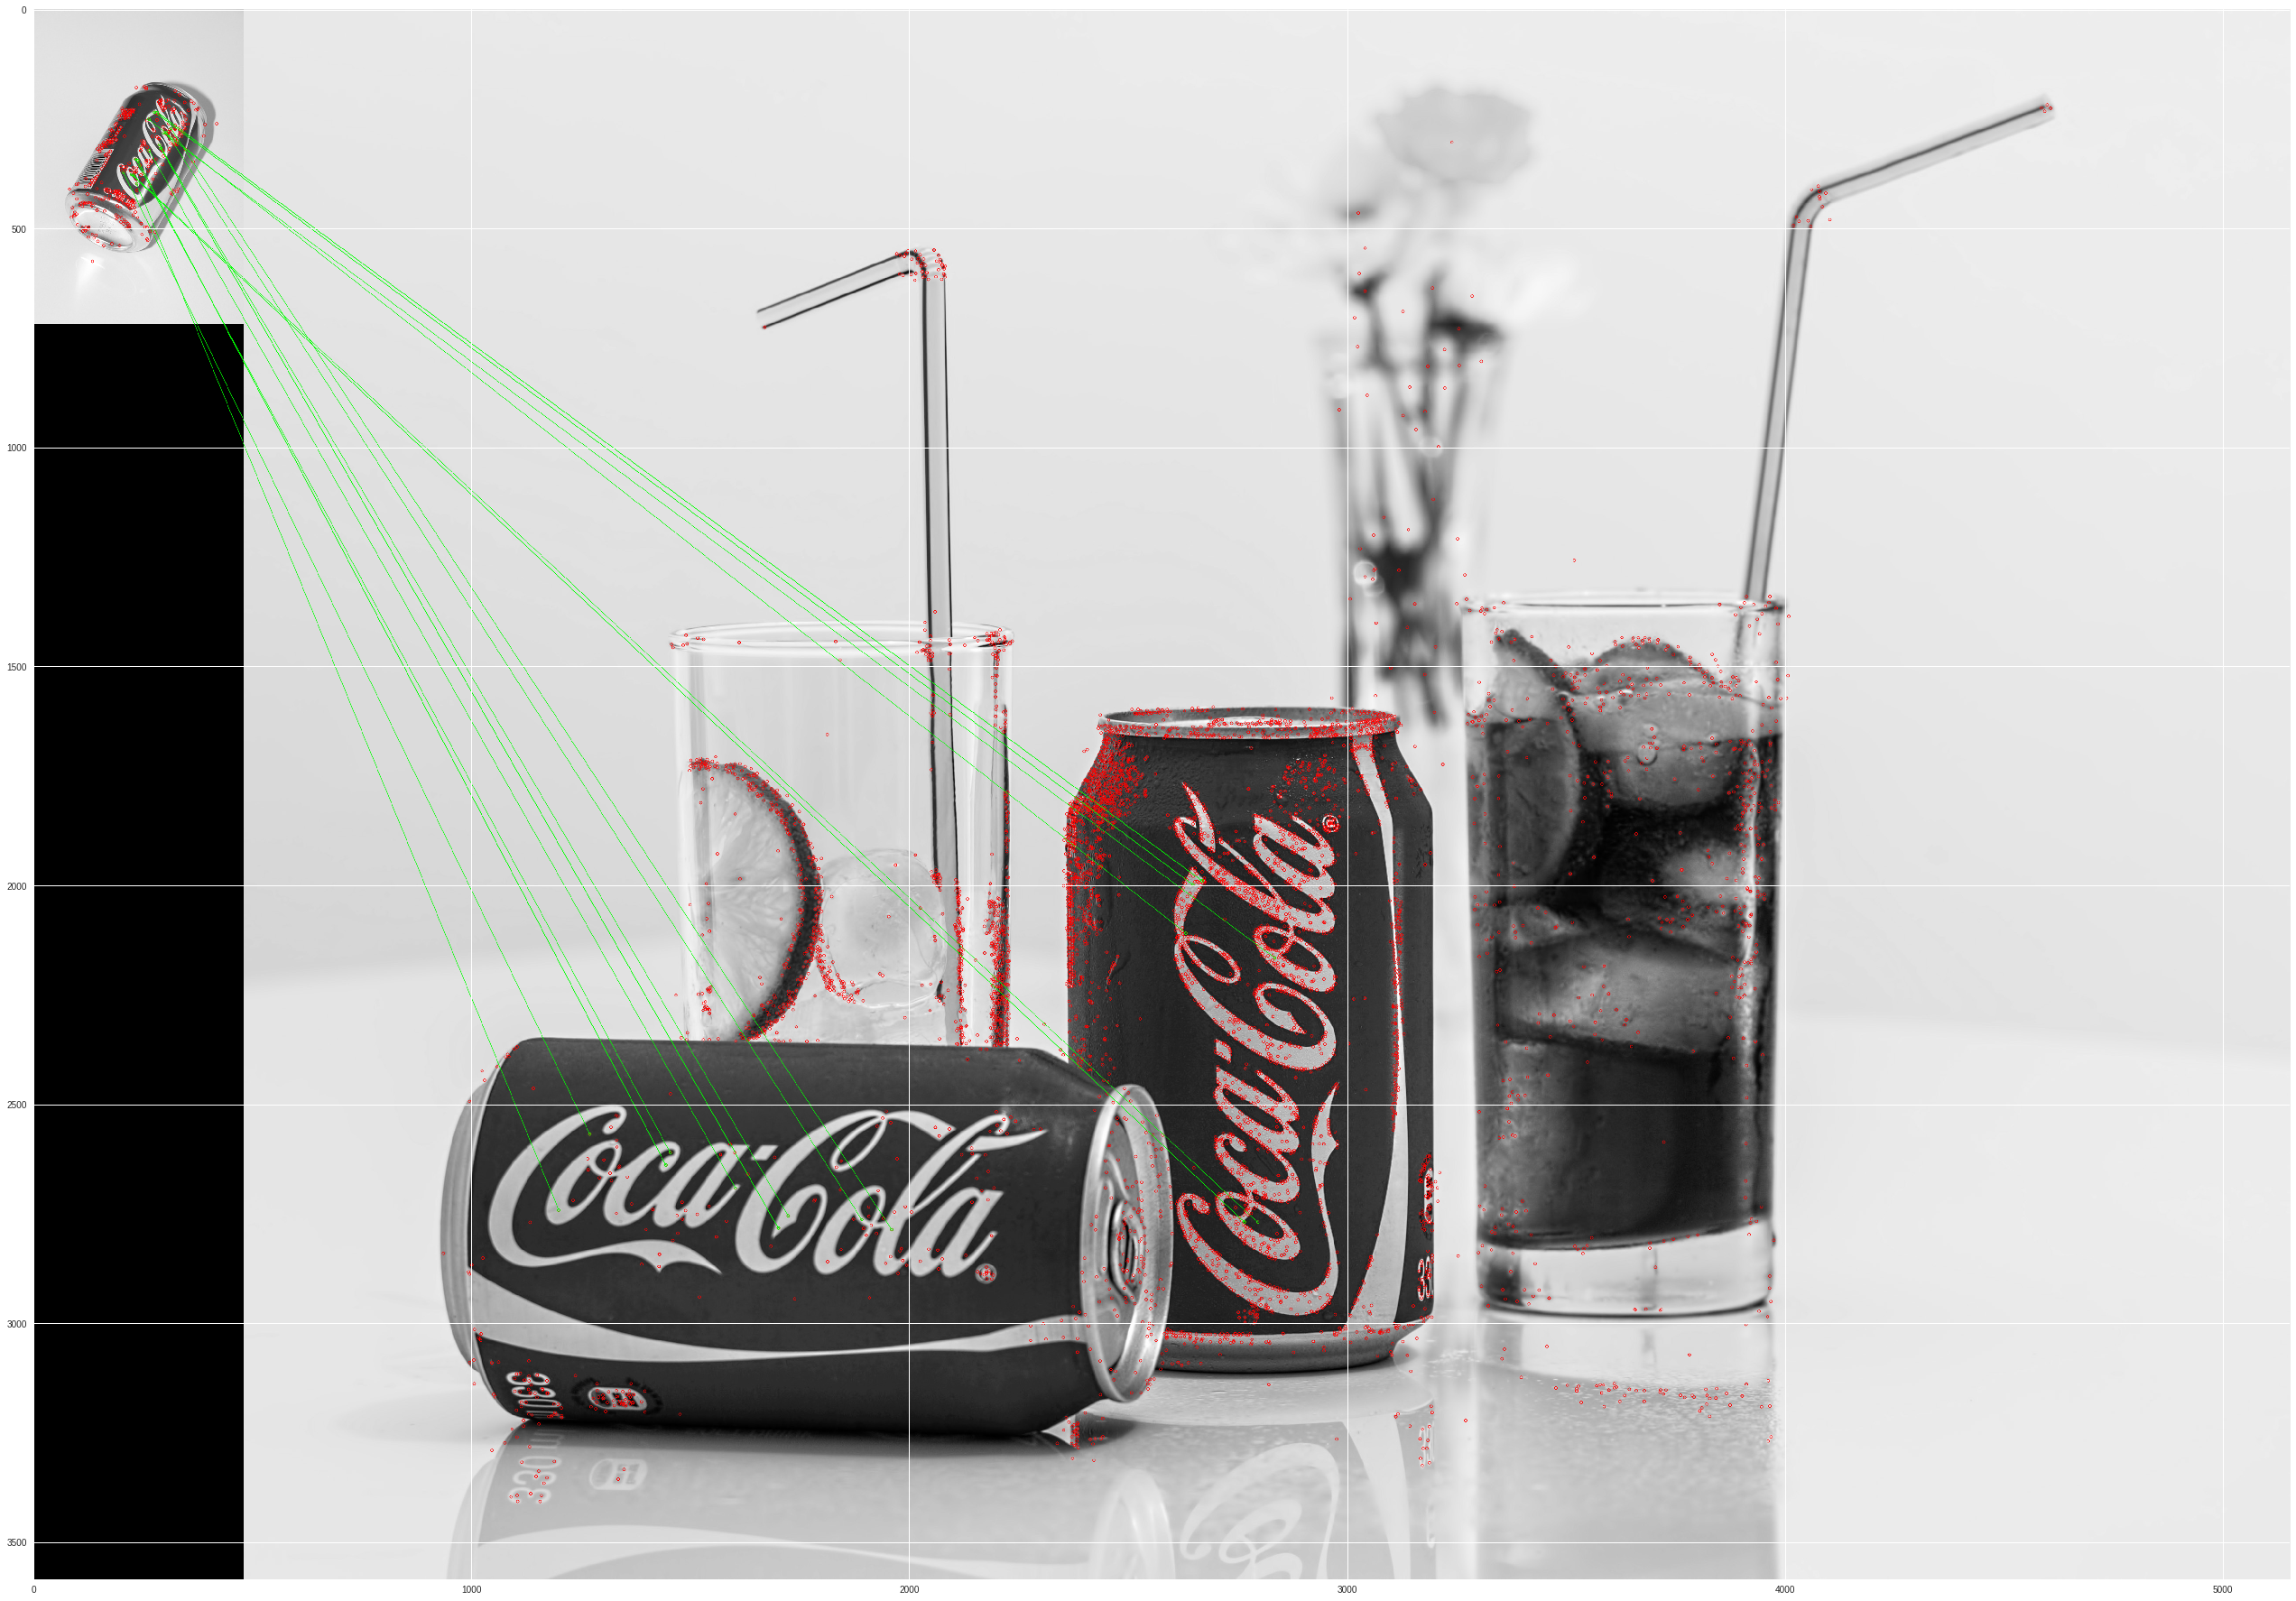

In [23]:
plt.figure(figsize=(48,32))
plt.imshow(img3)

Both the above approaches match the common features in the two images.

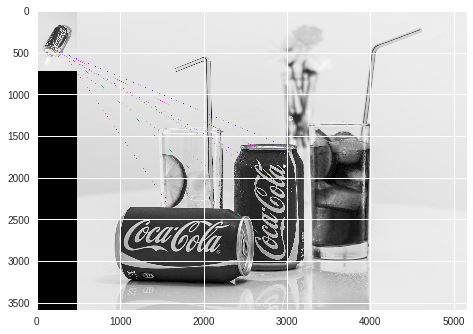

(<matplotlib.image.AxesImage at 0x7f8061d05630>, None)

In [26]:
# create BFMatcher object
bf = cv2.BFMatcher()

# Match descriptors.
matches = bf.match(desc,desc1)

# Sort them in the order of their distance.
matches = sorted(matches, key = lambda x:x.distance)

# Draw first 10 matches.
img4 = cv2.drawMatches(gray, kp, gray1, kp1,matches[:10],None, flags=2)

plt.imshow(img4),plt.show()

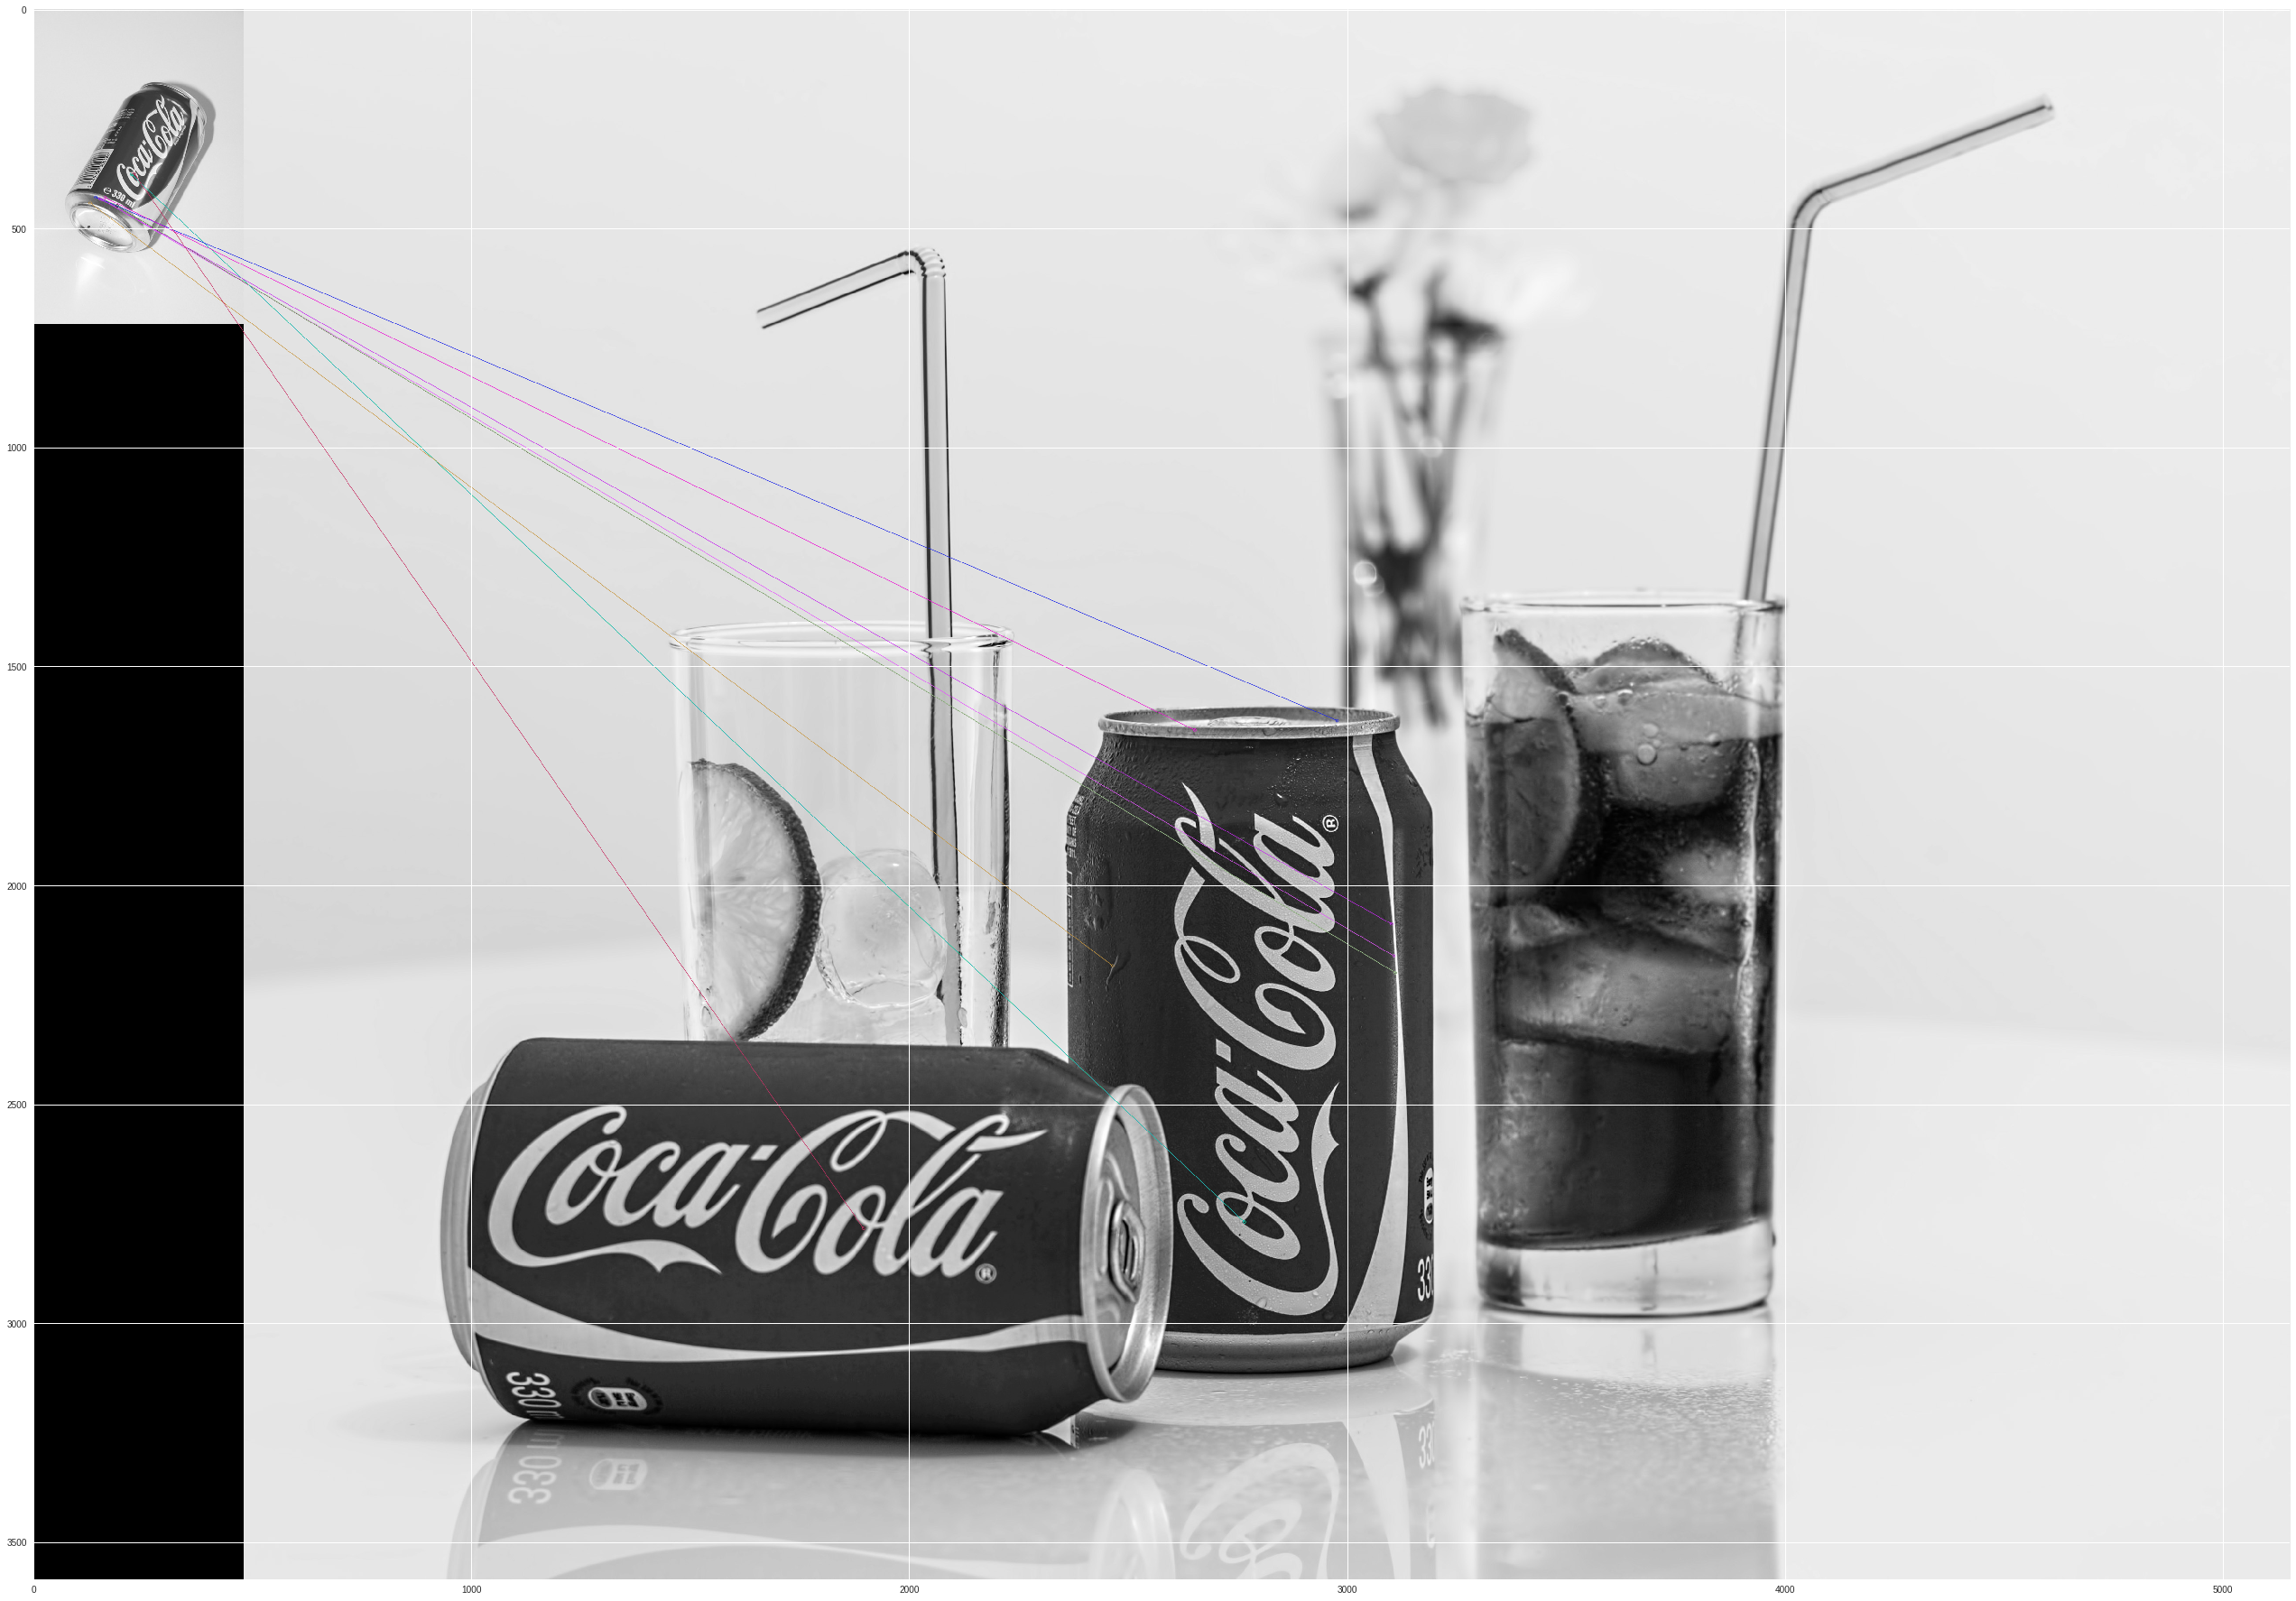

In [27]:
plt.figure(figsize=(48,32))
plt.imshow(img4)